# Machine Learning for Classification

## 3.1 Intro to Churn Prediction Project

The project aims to identify customers that are likely to churn or stoping to use a service. Each customer has a score associated with the probability of churning. Considering this data, the company would send an email with discounts or other promotions to avoid churning.

The ML strategy applied to approach this problem is binary classification, which for one instance can be expressed as:

$$g(X_i) = y_i$$

In the formula, $X_i$ is the info about the customers while $y_i$ is the model's prediction and belongs to {0,1}, being 0 the negative value or no churning, and 1 the positive value or churning. The output corresponds to the likelihood of churning.

In brief, the main idea behind this project is to build a model with historical data from customers and assign a score of the likelihood of churning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('customer_data.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## 3.2 Data Preparation

This session covered data obtention and some procedures of data preparation.

Commands, functions, and methods:

- !wget - Linux shell command for downloading data
- pd.read.csv() - read csv files
- df.head() - take a look of the dataframe
- df.head().T - take a look of the transposed dataframe
- df.columns - retrieve column names of a dataframe
- df.columns.str.lower() - lowercase all the letters
- df.columns.str.replace(' ', '_') - replace the space separator
- df.dtypes - retrieve data types of all series
- df.index - retrive indices of a dataframe
- pd.to_numeric() - convert a series values to numerical values. The errors=coerce argument allows making the transformation despite some encountered errors.
- df.fillna() - replace NAs with some value
- (df.x == "yes").astype(int) - convert x series of yes-no values to numerical values.

In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [4]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [6]:
df.dtypes[df.dtypes == 'object']

customerid          object
gender              object
partner             object
dependents          object
phoneservice        object
multiplelines       object
internetservice     object
onlinesecurity      object
onlinebackup        object
deviceprotection    object
techsupport         object
streamingtv         object
streamingmovies     object
contract            object
paperlessbilling    object
paymentmethod       object
totalcharges        object
churn               object
dtype: object

In [7]:
df_cell_values = list(df.dtypes[df.dtypes == 'object'].index)

for cell in df_cell_values:
    df[cell] = df[cell].str.lower().str.replace(' ', '_')

In [8]:
# to see all the data columns - to see all of them, we use transpose
# where rows become columns

df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [9]:
df.totalcharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

In [10]:
df.totalcharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

We notice from above that the total charges columns seems to contain numbers but it has an object type when we check for dtypes. This can be solved using pandas method to convert the column to a numeric column.

In [11]:
# pd.to_numeric(df.totalcharges) # this produces an error because there
# were apparently cells with empty values that were replace with
# underscores during our loop to replace spaces with "_".

# to solve the above problem, we add "errors" parameter
# and assign it to a variable
tc = pd.to_numeric(df.totalcharges, errors='coerce')
tc

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

In [12]:
# let's check for null values
df[tc.isnull()]

# let's get just two columns to see what we need clearly
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [13]:
# we replace the column with the converted values

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [14]:
# then fill the missing values from the coverted column with zeros
df.totalcharges = df.totalcharges.fillna(0)

df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,0.0
753,3115-czmzd,0.0
936,5709-lvoeq,0.0
1082,4367-nuyao,0.0
1340,1371-dwpaz,0.0
3331,7644-omvmy,0.0
3826,3213-vvolg,0.0
4380,2520-sgtta,0.0
5218,2923-arzlg,0.0
6670,4075-wkniu,0.0


we look at the churn column which we want to predict

In [15]:
df.churn

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

we observe that it is a yes and no column but we need as a numeric column

In [16]:
df.churn.unique()

array(['no', 'yes'], dtype=object)

In [17]:
# # create a copy of the dataframe
# df_copy = df.copy()   
    
# # create new columns for the unique values of the categorical columns
# for c in ['yes', 'no']:
#     df_copy['churn_%s' % c] = (df_copy.churn == c).astype('int')
    

# # for c in ['yes', 'no']:
# #     # df['churn_%s' % c] = (df.churn == c).astype('int')
# #     df.churn = (df.churn == c).astype('int')
    
# df_copy

In [18]:
df.churn.nunique()

2

In [19]:
# the preceeding code is not necessary 
# as the unique values for churn is just two

df.churn = (df.churn == 'yes').astype(int)
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int32

## 3.3 Setting up the Validation Framework

Splitting the dataset with Scikit-Learn.

Classes, functions, and methods:

- train_test_split - Scikit-Learn class for splitting datasets. Linux shell command for downloading data. The random_state argument set a random seed for reproducibility purposes.
- df.reset_index(drop=True) - reset the indices of a dataframe and delete the previous ones.
- df.x.values - extract the values from x series
- del df['x'] - delete x series from a dataframe

We are start with importing the library for splitting from scikit-learn

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# train_test_split? - # this helps with the docs for this
# the code below splits the dataset in two, 
# we want the test size to be 20% 
# while the remaining 80% goes for the train and the 'random state' is 
# added to make the split reproducible irrespective of 
# the hardware it is run on

# train_test_split(df, test_size=0.2, random_state=1)

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [22]:
len(df_full_train), len(df_test)

(5634, 1409)

We want to take the train dataset (which is df_full_train) and split it further into 60% and 20%. We want to get 20% of the df_full_train to assign to validation dataset. To achieve that, we need to know how much is 20% out of 80%, which is, $\frac{20}{80} = \frac{1}{4} = 0.25$

In [23]:
# we take the df_full_train and split with 
# the same code as the initial split

df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [24]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [25]:
# we want to reset the indexes for our dataset because they were
# shuffled on split. We don't have to do but it's nicer to.

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

Next, we need to get our churn variables, assign them to variables and delete them from the dataset

In [26]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_val.churn.values

In [27]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

## 4. EDA

The EDA for this project consisted of:

- Checking missing values
- Looking at the distribution of the target variable (churn)
- Looking at numerical and categorical variables


Functions and methods:

- df.isnull().sum() - retunrs the number of null values in the dataframe.
- df.x.value_counts() returns the number of values for each category in x series. The normalize=True argument retrieves the percentage of each category. In this project, the mean of churn is equal to the churn rate obtained with the value_counts method.
- round(x, y) - round an x number with y decimal places
- df[x].nunique() - returns the number of unique values in x series

We will be using the df_full_train for exploration

In [28]:
# df_full_train.isnull().sum() # we don't have missing values

# df_full_train.churn.value_counts() # to find the count of each value

# we can use the normalize to look at the % of churn. it divides the
# the number we have(gotten from the preceeding the code) by the total
# value_count of the element in the series -
# for 0, it is 4113/5634
# for 1, it is 1521/5634

df_full_train.churn.value_counts(normalize=True) 
# the result is known as "churn rate", which we can also get by
# computing the mean but it gives us for ones
# df_full_train.churn.mean()

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [29]:
# the global churn rate for this dataset is
global_churn_rate = df_full_train.churn.mean()

# we can round it off to 2 decimal places
round(global_churn_rate, 2)

0.27

with the result, we can say that 27% of our users are churning.

Now that we understand how our variables look like, we can explore other variables (both numerical and categorical). 

In [30]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

We can see that we have 3 numerical variables - tenure, monthlycharges and totalcharges. The "seniorcitizen" variable is not a numerical variable because the deals with whether or not a person is a seniorcitizen which is represented as 0 or 1

In [31]:
df_full_train.seniorcitizen.unique()

array([0, 1], dtype=int64)

A list is created for the numerical variables

In [32]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

df_full_train[numerical]

,tenure,monthlycharges,totalcharges
1814,12,19.70,258.35
5946,42,73.90,3160.55
3881,71,65.15,4681.75
2389,71,85.45,6300.85
3676,30,70.40,2044.75
...,...,...,...
905,9,100.50,918.60
5192,60,19.95,1189.90
3980,28,105.70,2979.50
235,2,54.40,114.10


The categorical variables are also collected into a list. We remove the id because it is more like an identifier and churn since it is our target variable

In [33]:
# df_full_train.columns # this gets us the columns so that we can
# select what we need

categorical = ['gender', 'seniorcitizen', 'partner', 'dependents', 
        'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 
        'techsupport','streamingtv', 'streamingmovies', 
        'contract', 'paperlessbilling',
       'paymentmethod']

df_full_train[categorical]

,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod
1814,male,0,yes,yes,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check
5946,female,0,no,no,yes,no,dsl,yes,yes,yes,yes,no,yes,one_year,no,credit_card_(automatic)
3881,male,0,yes,no,yes,yes,dsl,yes,yes,no,yes,no,no,two_year,no,bank_transfer_(automatic)
2389,male,0,yes,yes,yes,yes,dsl,yes,no,yes,yes,yes,yes,one_year,no,electronic_check
3676,male,0,no,no,yes,no,dsl,yes,yes,no,yes,yes,no,one_year,no,electronic_check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,male,1,no,no,yes,yes,fiber_optic,no,no,yes,no,yes,yes,month-to-month,yes,electronic_check
5192,male,0,no,yes,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check
3980,male,0,no,no,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,yes,electronic_check
235,male,0,no,no,yes,yes,dsl,no,yes,no,no,no,no,month-to-month,yes,mailed_check


In [34]:
# we want to check for the number unique values in the categorical
# variables/columns

df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

From the preceeding cell, it can be seen that we mostly have columns with only 2 and 3 different values while there's only one column with 4 different values

# 3.5 Feature Importance: Churn Rate and Risk Ratio

Churn rate: Difference between mean of the target variable and mean of categories for a feature. If this difference is greater than 0, it means that the category is less likely to churn, and if the difference is lower than 0, the group is more likely to churn. The larger differences are indicators that a variable is more important than others.

Risk ratio: Ratio between mean of categories for a feature and mean of the target variable. If this ratio is greater than 1, the category is more likely to churn, and if the ratio is lower than 1, the category is less likely to churn. It expresses the feature importance in relative terms.

These values tell us how important the various categorical variables are

Functions and methods:

- df.groupby('x').y.agg([mean()]) - returns a dataframe with mean of y series grouped by x series
- display(x) displays an output in the cell of a jupyter notebook.

### 3.5a Churn Rate

We can look at the churn rate within each group

In [35]:
# let's start with the females

churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [36]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [37]:
global_churn_rate

0.26996805111821087

In [38]:
global_churn_rate - churn_female

# we see that the result is extremely tiny

-0.006855983216553063

In [39]:
global_churn_rate - churn_male

# we see that the result is also extremely tiny

0.006754520462819769

We can see that churn amongst females and males are not so different from the global churn. We go on to look at the churn rate for partners

In [40]:
df_full_train.partner.unique()

array(['yes', 'no'], dtype=object)

In [41]:
# for those with partner: yes and no for those without partners

# for those with partners
churn_with_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_with_partner

0.20503330866025166

In [42]:
# for those without partners
churn_without_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_without_partner

0.3298090040927694

In [43]:
global_churn_rate - churn_with_partner

0.06493474245795922

In [44]:
global_churn_rate - churn_without_partner

-0.05984095297455855

As against global churn rate which is 26%, we can see that there is a significant difference when considering those with partners which is 20% and 32% for those without partners. Those without partners are 5% more than the global churn rate while those with partners are 6-7% less than the global churn rate.

This is telling us that irrespective of gender, churn rate is approximately the same but for the partner variable, the difference in the rate makes it more important for predicting churn variable.

#### Feature importance

When we check the difference between the global churn rate and churn rate within groups, and the difference is >0, it means that the global churn rate is greater than the group churn rate and hence that group is less likely to churn. On the other hand, when the result is -ve, it means that the group churn is higher than the global churn. This means that for such groups, there are more likely to churn.

It can be observed that the differences between for female produced a -ve result but it was very tiny. We are more interested in differences that are large. 

### 3.5b Risk Ratio

Instead of subtraction like in churn rate, we can also divide one by another to get the risk ratio. Here we divide the group churn rate by the global churn rate We can use the partners variables to test this

In [45]:
churn_with_partner / global_churn_rate

0.7594724924338315

In [46]:
churn_without_partner / global_churn_rate

1.2216593879412643

values > 1 indicates a higher likelihood to churn and vlaues < 1 are less likely to churn. In our case, people without partners are more likely to churn(high risk) than those with partners(low risk). 

Both churn rate and risk ratio are telling us the same thing but in a different way. In the case of the churn rate, we don't see how much higher; we see it in more absolute terms but in risk ratio gives us the result in relative terms.

We really cannot do what we have done so far for each variables, so we find a way to automate the process of doing for everyone of our variables. We can implement a SQL-like query to get it done by translating it to pandas equivalent.

    SELECT
        gender,
        AVG(churn),
        AVG(churn) - global_churn AS diff
        AVG(churn) / global_churn AS risk
        
    FROM
        data
    
    GROUP BY
        gender

In [47]:
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
df_group

,mean,count
gender,,
female,0.276824,2796
male,0.263214,2838


In [48]:
# we want to create the new columns
df_group['diff'] = df_group['mean'] - global_churn_rate
df_group['risk'] = df_group['mean'] / global_churn_rate
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [49]:
from IPython.display import display

In [50]:
# we want to take what we have done in the 2 previous cell
# and repeat it for all the categorical columns
# because the result that we want to display is within the loop,
# we import a function from a package that can help us view it
# and then wrap the result(df_group) in it

for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print()
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980





seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208





partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472





dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651





phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412





multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948





internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201





onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570





onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660





deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480





techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390





streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328





streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182





contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730





paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560





paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


From the above calculations, it can be seen that within the categories, some values are higher than 1 and less than 1 significantly, e.g. contract where the month-to-month are more likely to churn than one_year and two_year. It will be great to have a single number from each of the group that tells us the importance of a variable overall i.e, which variables are more important than others - this is where mutual information comes in. 

## 3.6 Feature Importance: Mutual Information

Mutual information is a concept from information theory, which measures how much we can learn about one variable if we know the value of another. Mutual Information of 2 random variables is a measure of mutual dependence between the two variables. It quantifies the amount of information obtained about one random variable by observing the other random variable - WIKIPEDIA

In this project, we can think of this as how much do we learn about churn if we have the information from a particular feature. So, it is a measure of the importance of a categorical variable. The intuition is that **the higher the mutual info is, the more we learn about the churn by observing the value of another variable** We can use scikit-learn to implement mutual information.

Classes, functions, and methods:

mutual_info_score(x, y) - Scikit-Learn class for calculating the mutual information between the x target variable and y feature.
- df[x].apply(y) - apply a y function to the x series of the df dataframe.
- df.sort_values(ascending=False).to_frame(name='x') - sort values in an ascending order and called the column as x.

In [51]:
from sklearn.metrics import mutual_info_score

In [52]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [53]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [54]:
mutual_info_score(df_full_train.churn, df_full_train.partner)

0.009967689095399745

Comparing **contract** with **gender**, we see that contract will be more useful in predicting churn rate. **partner** on the other hand is more useful than **gender** but less important than **contract**.

Now that we have this, we can apply it to all the categorical variables that we have. We achieve it using *df_full_train.apply()* function which takes in only one argument but our mutual_info_score takes in 2 arguments. What we do is to create a function to hold the *mutual_info_score* before passing it to *df_full_train.apply()* 

In [55]:
# we put what we have in a function

def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [56]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi
# the code is applying our .apply to the categorical columns

gender              0.000117
seniorcitizen       0.009410
partner             0.009968
dependents          0.012346
phoneservice        0.000229
multiplelines       0.000857
internetservice     0.055868
onlinesecurity      0.063085
onlinebackup        0.046923
deviceprotection    0.043453
techsupport         0.061032
streamingtv         0.031853
streamingmovies     0.031581
contract            0.098320
paperlessbilling    0.017589
paymentmethod       0.043210
dtype: float64

In [57]:
# here we want to sort. We set ascending to false because we want
# the most important ones to come first
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

From the sort, we can see that the contract is the most important one while the gender is the least important. Partner is important but relative to the preceeding ones, it is least important.

From observation, we can work with variables from contract down to payment method since they have very high score. These kind of variables is why machine learning actually works

## 3.7 Feature Importance: Correlation

Previously, we dealt with categorical variables, now we want to look at the numerical variables in this section. Correlation is used to measure feature importance for numerical variables.

Correlation coefficient measures the degree of dependency between two variables. This value is negative if one variable grows while the other decreases, and it is positive if both variables increase. Depending on its size, the dependency between both variables could be low, moderate, or strong. It allows measuring the importance of numerical variables.

The formular for correlation coefficient is:

$$r = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sqrt{\sum{(x_i - \bar{x})^2} \sum{(y_i - \bar{y})^2}}}$$

If r is correlation coefficient, then the correlation between two variables is:

- LOW when r is between [0, -0.2) or [0, 0.2)
- MEDIUM when r is between [-0.2, -0.5) or [2, 0.5)
- STRONG when r is between [-0.5, -1.0] or [0.5, 1.0]

Positive Correlation vs. Negative Correlation

- When r is positive, an increase in x will increase y.
- When r is negative, an increase in x will decrease y.
- When r is 0, a change in x does not affect y.

y is a binary variable with values between 0 and 1 while x can be any number. In our case, churn is y since the numbers are between 0 and 1 while other features e.g. tenure are x.
- The more the value of our x/features, the higher the churn rate/y.
- The less the value of x/features, the lower our churn rate/y
- when it is 0, means our x/features doesn't affect churn rate/y

Functions and methods:

- df[x].corrwith(y) - returns the correlation between x and y series. This is a function from pandas

In [58]:
# we want to check the correlation 
# between our numerical variables/x and our churn rate/y

df_full_train[numerical].corrwith(df_full_train.churn)

# if we only care about the importance and not the direction,
# we can look for the absolute values
# (removing the -ve sign in front of it)

# df_full_train[numerical].corrwith(df_full_train.churn).abs()
# the result for the absolute value is in sorted order 
# and we can deduce that tenure is 
# the most important numerical feature while totalcharges is the
# least important one.

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

From our understanding of correlation coefficient, an increase in tenure and totalcharges will cause a decrease in churn rate (i.e. customers stays longer) while an increase in monthly charges will increase churn rate(i.e. customers are most likely to leave).

We can look at tenure and look at customers who have been with our company for 2 months to check their churn rate

In [59]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

We can see that there's about 59% churn rate for customers who have been with the company for two months. This is very high.

We can go ahead to check for people who have been there for more than 2 months and less than 12 months

In [60]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

0.3994413407821229

We can see that the result for more than 2 months and less than 12 months is also high at about 40%

In [61]:
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

The result for customers who have stayed > 12 months quite low at 17%

Next we look monthlycharges

In [62]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

# with charges less than $20, we have almost 60% churn rate

0.08795411089866156

In [63]:
df_full_train[(df_full_train.tenure > 20) & (df_full_train.tenure <= 50)].churn.mean()

# with charges greater than $20 and less than or equal to $50,
# we have about 21% churn rate

0.2147165259348613

In [64]:
df_full_train[df_full_train.monthlycharges <= 50].churn.mean()

# with charges less than or equal $50, we have about 16% churn rate 

0.1562329885683179

In [65]:
# import matplotlib.pyplot as plt
# ax = df[['Events1','Events2']].plot(kind='bar', title ="test", figsize=(15, 10), legend=True, fontsize=12)
# ax.set_xlabel("Name", fontsize=12)
# ax.set_ylabel("Number", fontsize=12)
# plt.show()

# ax = df_full_train[['churn', 'tenure']].plot(kind='bar', figsize=(15, 10), legend=True, fontsize=12)
# ax.set_xlabel("churn", fontsize=12)
# ax.set_ylabel("churn", fontsize=12)
# plt.show()

## 8. One Hot Encoding (OHE)

One-Hot Encoding allows encoding categorical variables into numerical ones. This method represents each category of a variable as one column, and a 1 is assigned if the value belongs to the category or 0 otherwise.

Classes, functions, and methods:

- df[x].to_dict(oriented='records') - convert x series to dictionaries, oriented by rows.
- DictVectorizer().fit_transform(x) - Scikit-Learn class for converting x dictionaries into a sparse matrix, and in this way doing the one-hot encoding. It does not affect the numerical variables.
- DictVectorizer().get_feature_names() - returns the names of the columns in the sparse matrix.

At this point, we start using the df_train instead of the df_full_train

In [66]:
 from sklearn.feature_extraction import DictVectorizer

In [67]:
df_train[['gender', 'contract', 'tenure']].iloc[:100] # first 100

,gender,contract,tenure
0,female,two_year,72
1,male,month-to-month,10
2,female,month-to-month,5
3,female,month-to-month,5
4,female,two_year,18
...,...,...,...
95,male,one_year,39
96,female,month-to-month,19
97,male,month-to-month,21
98,male,one_year,43


In [68]:
# we want to turn the preceeding value to a dictionary
# the orient value in the to_dict method causes each row
# to become a dictionary

# we this, we can get for both the categorical and numerical
# variable and all the rows

# dicts = df_train[['gender', 'contract', 'tenure']].iloc[:100].to_dict(orient='records')
# dicts

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [69]:
# we use the DictVectorizer

# dv = DictVectorizer() # produced a sparse matrix
dv = DictVectorizer(sparse=False)

In [70]:
# we go on to pass the 'dicts' value to the vectorizer

dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [71]:
dv.get_feature_names_out()

# each name in this feature aligns with each columns in the
# numpy array result gotten in the cell below
# this means that the first 3 are for contract
# while the last 2 are for gender

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [72]:
# dv.transform(train_dicts)
# dv.transform(train_dicts[:5])
dv.transform(train_dicts[:5])[0]

# this produces a sparse matrix and we don't want that.
# what we do is to set the sparce to false where the DictVectorizer
# was initialized so that we get a numpy array
# if a numerical variable is added to the dicts variable,
# the DictVectorizer is smart enough to recognize it 
# and leave it as it is

array([0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 1.15500e+02, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 7.20000e+01, 8.42515e+03])

In [73]:
# in summary to fit and train at the same time

X_train = dv.fit_transform(train_dicts)
X_train.shape

(4225, 45)

In [74]:
# for the validation dataset

val_dicts = df_val[categorical + numerical].to_dict(orient='records')


# we are only going to transform without fitting
# for the val dataset because we want to run our y_pred on val
# dataset. Fitting will cause it to learn from the val dataset.
# This is not what we want because this is the dataset for 
# validating our model before testing it.

In [93]:
X_val = dv.fit_transform(val_dicts)
X_val.shape

(1409, 45)

## 9. Logistic Regression

In general, supervised models follow can be represented with this formula:

$$g(X_i) = y$$

Depending on what is the type of target variable, the supervised task can be regression or classification (binary or multiclass). Binary classification tasks can have negative (0) or positive (1) target values. The output of these models is the probability of xi belonging to the positive class.

Logistic regression is similar to linear regression because both models take into account the bias term and weighted sum of features. The difference between these models is that the output of linear regression is a real number, while logistic regression outputs a value between zero and one, applying the sigmoid function to the linear regression formula.


$$g(X_i) = Sigmoid(w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n)$$

$$Sigmoid = \frac{1}{1 + exp(-z)}$$


In this way, the sigmoid function allows transforming a score into a probability.

In machine learning, we have 2 major problems, **regression** and **classification** and for classification, we have **binary** and **multiclass** problems. Logistic regression aims to solve the **binary** classification problems. In binary classification, the target variable can only be 0 and 1 where the 0 is NEGATIVE(no churn, no spam) and the 1 is POSITIVE(churn, spam). 

Our model $g(X_i)$ outputs a number between 0 and 1 so the numbers can be treated as probability of $x_i$ belonging to the +ve class. 

In [75]:
# implementing the sigmoid function

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [76]:
z = np.linspace(-5, 5, 51)

In [77]:
sigmoid(z)

array([0.00669285, 0.00816257, 0.0099518 , 0.01212843, 0.01477403,
       0.01798621, 0.02188127, 0.02659699, 0.03229546, 0.03916572,
       0.04742587, 0.05732418, 0.06913842, 0.0831727 , 0.09975049,
       0.11920292, 0.14185106, 0.16798161, 0.19781611, 0.23147522,
       0.26894142, 0.31002552, 0.35434369, 0.40131234, 0.450166  ,
       0.5       , 0.549834  , 0.59868766, 0.64565631, 0.68997448,
       0.73105858, 0.76852478, 0.80218389, 0.83201839, 0.85814894,
       0.88079708, 0.90024951, 0.9168273 , 0.93086158, 0.94267582,
       0.95257413, 0.96083428, 0.96770454, 0.97340301, 0.97811873,
       0.98201379, 0.98522597, 0.98787157, 0.9900482 , 0.99183743,
       0.99330715])

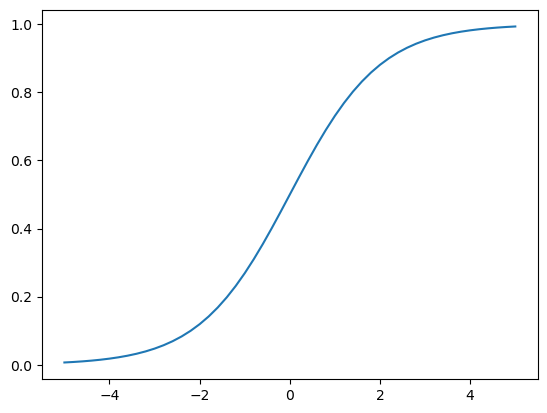

In [78]:
plt.plot(z, sigmoid(z))

# behind the line is the negative part where it tries to
# reach 0 and the part in front of the line is the positive
# part where it tries to reach 1
# with sigmoid, you get probability

In [79]:
# # for linear regression

# def linear_regression(xi):
#     result = w0
    
#     for j in range(len(w)):
#         result = result + xi[j] * w[j]
        
#     return result

In [80]:
# for logistic regression we are looking at the score and
# intermediate score and then apply sigmoid to the score

# def linear_regression(xi):
#     score = w0
    
#     for j in range(len(w)):
#         score = score + xi[j] * w[j]
    
#     result = sigmoid(score)
#     return result

In [81]:
sigmoid(1) # the result never 

0.7310585786300049

## 10. Training Logistic Regression with Scikit-Learn

This video was about training a logistic regression model with Scikit-Learn, applying it to the validation dataset, and calculating its accuracy.

Classes, functions, and methods:

- LogisticRegression().fit_transform(x) - Scikit-Learn class for calculating the logistic regression model.
- LogisticRegression().coef_[0] - returns the coeffcients or weights of the LR model
- LogisticRegression().intercept_[0] - returns the bias or intercept of the LR model
- LogisticRegression().predict[x] - make predictions on the x dataset
- LogisticRegression().predict_proba[x] - make predictions on the x dataset, and returns two columns with their probabilities for the two categories - soft predictions

#### Summary
- Train a model with scikit-learn
- Apply it to the validation dataset
- Calculate the accuracy

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
# create a model from the imported library

model = LogisticRegression()

# to train the model, we use the X_train from lesson 8,
# and y_train

model.fit(X_train, y_train)

C:\Users\DELL\anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [84]:
# we want to get the bias term. we achieve that using intercept

model.intercept_[0]

-0.10901390050687017

In [85]:
# We want to look inside the model that we trained to get the
# weights using coeff_

# model.coef_

# we see that it is a 2-dimensional array with one row
# we just need only the w(weights) by using the code below

model.coef_[0].round(3)

array([ 0.474, -0.175, -0.407, -0.029, -0.079,  0.063, -0.089, -0.082,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.285, -0.232,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.071, -0.06 ,  0.141,
       -0.249,  0.216, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.214, -0.089, -0.233, -0.071,  0.   ])

In [86]:
# to use the model

# model.predict(X_train)

# the result gotten from running the code above
# are called "hard predictions" because
# we already have their exact labels. 1 is churn and 0 is not
# churn. we don't know the certainty of the predictions, 
# we don't know the probability. to learn the probability, we use
# a function called predict_proba

model.predict_proba(X_train)

# the result for the code above is known as "soft predictions"
# because it's not just a number, 0 or 1 but score.
# there are 2 columns because it is a 2-dimensional matrix
# where the first one is being the probability of 
# being -ve class and the second column 
# is the probability of being +ve class. 
# we are more interested in the second column which is the 
# probability of "churning".

array([[0.90426023, 0.09573977],
       [0.32075082, 0.67924918],
       [0.36642128, 0.63357872],
       ...,
       [0.46979664, 0.53020336],
       [0.95759055, 0.04240945],
       [0.30130392, 0.69869608]])

Take the result of result from the first row:
- 0.90426023:- This has a probabilty of 90% churning
- 0.09573977:- This has about 9% churning rate

We are more interested in the second column so we write a code to collect the second column

In [91]:
y_pred = model.predict_proba(X_train)[:, 1]
y_pred

# we make this our soft prediction.
# We use this y_pred to make decision to
# treat people as churning above a certain threshold

array([0.09573977, 0.67924918, 0.63357872, ..., 0.53020336, 0.04240945,
       0.69869608])

In [94]:
# we can apply the above code to the validation dataset

y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.0089427 , 0.20436801, 0.21223906, ..., 0.13594882, 0.79954066,
       0.83723744])

In [95]:
# we write the decision we want to use

churn_decision = (y_pred >= 0.5)
churn_decision

# false means that the customer is not churning 
# while true means that the customer will churn

array([False, False, False, ..., False,  True,  True])

In [96]:
# let's check from the dataset the customer that will churn and
# hence receive promotional email

df_val[churn_decision]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
3,8433-wxgna,male,0,no,no,2,yes,no,fiber_optic,yes,no,no,no,no,no,month-to-month,yes,electronic_check,75.70,189.20
8,3440-jpscl,female,0,no,no,6,yes,no,fiber_optic,no,no,yes,yes,yes,yes,month-to-month,yes,mailed_check,99.95,547.65
11,2637-fkfsy,female,0,yes,no,3,yes,no,dsl,no,no,no,no,no,no,month-to-month,yes,mailed_check,46.10,130.15
12,7228-omtpn,male,0,no,no,4,yes,no,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,88.45,370.65
19,6711-fldfb,female,0,no,no,7,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,74.90,541.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,5976-jcjrh,male,0,yes,no,10,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.30,738.20
1398,2034-cgrhz,male,1,no,no,24,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,yes,credit_card_(automatic),102.95,2496.70
1399,5276-kqwhg,female,1,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,69.60,131.65
1407,6521-yytyi,male,0,no,yes,1,yes,yes,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,93.30,93.30


In [98]:
# now we want to see how good our model is/performance.
# previously, we used RMSE to check but now we can use
# accuracy which tells us how many correct prediction we 
# made

y_val

array([0, 0, 0, ..., 0, 1, 1])

In [100]:
# let's check the churn decision and compare. We are interested
# in how many of them match

churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [101]:
# we can do a direct comparison that will return true for match
# and false for the ones that don't match

y_val == churn_decision

array([ True,  True,  True, ...,  True,  True,  True])

In [103]:
# we can check for the mean of our comparison to see how many %
# match we have

(y_val == churn_decision).mean()

# we can see in the result that there's an 80% match

0.8034066713981547

In [104]:
# We can create a dataframe to see 
# what is happening inside of the data

df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [105]:
df_pred

,probability,prediction,actual
0,0.008943,0,0
1,0.204368,0,0
2,0.212239,0,0
3,0.542899,1,1
4,0.213854,0,0
...,...,...,...
1404,0.312374,0,0
1405,0.039163,0,1
1406,0.135949,0,0
1407,0.799541,1,1


With the actual value and prediction laid out side by side, we can see the predictions that are correct as against the actual value. Values at index 0 - 4, are similar, therefore correct prediction while the one at index 1405 is not correct.

We can check for the correct ones and add them to the table

In [106]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [108]:
df_pred

# we can see that we have True for a match while it's False
# when there's no match

,probability,prediction,actual,correct
0,0.008943,0,0,True
1,0.204368,0,0,True
2,0.212239,0,0,True
3,0.542899,1,1,True
4,0.213854,0,0,True
...,...,...,...,...
1404,0.312374,0,0,True
1405,0.039163,0,1,False
1406,0.135949,0,0,True
1407,0.799541,1,1,True


In [109]:
# now we want to check the fraction of correct ones

df_pred.correct.mean()

# our model is 80% correct

0.8034066713981547

## 11. Model Interpretation

This video was about the interpretation of coefficients, and training a model with fewer features.

In the formula of the logistic regression model, only one of the one-hot encoded categories is multiplied by 1, and the other by 0. In this way, we only consider the appropriate category for each categorical feature.

Classes, functions, and methods:

- zip(x,y) - returns a new list with elements from x joined with their corresponding elements on y

In [113]:
# we want to zip the coefficients and their feature names

# zip(dv.get_feature_names_out(), model.coef_[0].round(3))

# to see the result, we want to wrap it in a dictionary
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

# we a dictionary

{'contract=month-to-month': 0.474,
 'contract=one_year': -0.175,
 'contract=two_year': -0.407,
 'dependents=no': -0.029,
 'dependents=yes': -0.079,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.082,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.285,
 'paperlessbilling=no': -0.232,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.071,

In [114]:
# We train a smaller model with a subset of features

small = ['contract', 'tenure', 'monthlycharges']

In [118]:
# df_train[small]

# take top 10
# df_train[small].iloc[:10]

# make into a dictionary so that it can be used for our
# vectorizer
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [120]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_train[small].to_dict(orient='records')

In [121]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [123]:
# we look at the feature we now have

dv_small.get_feature_names_out()

# we have only 5 variables, 3 binary features for the contract
# one for monthlycharges and one for tenure

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [124]:
# We get our feature matrix, X

X_train_small = dv_small.transform(dicts_train_small)

In [125]:
# Now we need to train a model

model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [129]:
# Now that we have our model, let's look at the coefficients

# bias term
w0 = model_small.intercept_[0]
w0

-2.4767756582707863

In [132]:
# coefficient(weights)

w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [133]:
# we can go ahead to join the features for the small and their
# weights

dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

#### Model Interpretation

We have w0(-2.4767756582707863), then we have 3 weights for contract(contract=month-to-month: 0.97, contract=one_year: -0.025, contract=two_year: -0.949) + monthlycharges: 0.027 + tenure: -0.036. The bias term is our assumption about the customer without knowing anything about them.

## 12. Using Log Reg

We trained the logistic regression model with the full training dataset (training + validation), considering numerical and categorical features. Thus, predictions were made on the test dataset, and we evaluate the model using the accuracy metric.

In this case, the predictions of validation and test were similar, which means that the model is working well.

In [137]:
# get the model with all the features
# and train our model on the full_train
# we need to get the dictionaries and the feature matrix
# then we train a model on the feature matrix
# and we do the same for the test dataset and then proceed to get
# the accuracy

dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')
dicts_full_train[:3]

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'tenur

In [138]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [141]:
y_full_train = df_full_train.churn.values
y_full_train

array([0, 1, 0, ..., 1, 1, 0])

In [142]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

LogisticRegression()

In [143]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')
dicts_full_train[:3]

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'tenur

In [145]:
X_test = dv.transform(dicts_test)
# I noticed that we only transform without 
# fitting when dealing with the test dataset

In [147]:
y_pred = model.predict_proba(X_test)[:, 1]
y_pred

array([0.06224296, 0.17473875, 0.37026701, ..., 0.00638005, 0.16576097,
       0.59688521])

In [148]:
churn_decision = (y_pred >= 0.5)
churn_decision

array([False, False, False, ..., False, False,  True])

In [150]:
(churn_decision == y_test).mean()

# we see from the result that our model has about 61% accuracy

0.6167494677075941

In [153]:
# using the model

customer = dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [154]:
# the model will return a probability
# we need to get the feature matrix for this customer

X_small = dv.transform([customer])
X_small

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 9.39500e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 3.20000e+01, 2.86145e+03]])

In [155]:
X_small.shape

# (1, 45) - we have one customer and 45 features

(1, 45)

In [158]:
# putting the X_small into a model

model.predict_proba(X_small)[0, 1]

# from the result, we see that this customer has about 40%
# probability of churning which means that this customer is most
# likely not going to churn

0.4056810977898627

In [159]:
y_test[10]

# from the result, we can see that this customer is not going
# to churn

0

In [164]:
# we can try the last customer on our model

customer = dicts_test[-1]
X_small = dv.transform([customer])
X_small.shape
model.predict_proba(X_small)[0, 1]

# from the result, we see that this customer has about 60%
# probability of churning which means that this customer is most
# likely to churn

0.5968852088295923

In [166]:
y_test[-1]

# from the result, we can see that this customer is going
# to churn

1

## 13. Summary

In this session, we worked on a project to predict churning in customers from a company. We learned the feature importance of numerical and categorical variables, including risk ratio, mutual information, and correlation coefficient. Also, we understood one-hot encoding and implemented logistic regression with Scikit-Learn.